In [56]:
# Import packages + load dataframe
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Load CSV file into DataFrame
df = pd.read_csv('data.csv')

C:\Users\bryan\AppData\Local\Temp\ipykernel_26912\1148624869.py:7: DtypeWarning: Columns (690,691,692,703,706,708,709,710,711,712,713,714,715,716,717,718,719,720,721,1172,1174,1185,1214) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [57]:
# Analyze dataframe

print(list(df.columns))

['artificial_id', 'Non_SOGI_School', 'Location', 'QN1', 'QN2', 'QN3', 'QN4a', 'QN4b', 'QN4c', 'QN4d', 'QN4e', 'QN5a', 'QN5b', 'QN5c', 'QN5d', 'QN5e', 'QN6', 'QN7', 'QN8', 'QN9', 'QN10', 'QN11a', 'QN11b', 'QN11c', 'QN11d', 'QN11e', 'QN11f', 'QN11g', 'QN11h', 'QN11i', 'QN11j', 'QN11k', 'QN11l', 'QN11m', 'QN11n', 'QN12a', 'QN12b', 'QN12c', 'QN12d', 'QN12e', 'QN12f', 'QN12g', 'QN12h', 'QN12i', 'QN12j', 'QN12k', 'QN12l', 'QN12m', 'QN12n', 'QN13', 'QN14a', 'QN14b', 'QN14c', 'QN14d', 'QN14e', 'QN14f', 'QN14g', 'QN14h', 'QN14i', 'QN14j', 'QN14k', 'QN14l', 'QN14m', 'QN14n', 'QN14o', 'QN14p', 'QN15', 'QN16', 'QN17', 'QN18a_a', 'QN18a_b', 'QN18a_c', 'QN18a_d', 'QN18a_e', 'QN18a_f', 'QN18a_g', 'QN18a_h', 'QN18a_i', 'QN18a_j', 'QN18a_k', 'QN18b_a', 'QN18b_b', 'QN18b_c', 'QN18b_d', 'QN18b_e', 'QN18b_f', 'QN18b_g', 'QN18b_h', 'QN18b_i', 'QN18b_j', 'QN18c_a', 'QN18c_b', 'QN18c_c', 'QN18c_d', 'QN18c_e', 'QN18c_f', 'QN18c_g', 'QN18c_h', 'QN18c_i', 'QN18c_j', 'QN18d_a', 'QN18d_b', 'QN18d_c', 'QN18d_d', '

In [58]:
# View ranges of data in each column


for col in df.columns:
    unique_values = df[col].dropna().unique()  # Drop NaNs if you don’t want them in the list
    unique_values_list = [float(val) if isinstance(val, (float, int)) else val for val in unique_values]
    print(f"{col}: {unique_values_list}")

artificial_id: ['B2100007', 'B2100018', 'B2100021', 'B2100035', 'B2100036', 'B2100049', 'B2100054', 'B2100063', 'B2100072', 'B2100077', 'B2100090', 'B2100091', 'B2100105', 'B2100108', 'B2100119', 'B2100126', 'B2100133', 'B2100144', 'B2100147', 'B2100161', 'B2100162', 'B2100175', 'B2100180', 'B2100189', 'B2100198', 'B2100203', 'B2100216', 'B2100217', 'B2100231', 'B2100234', 'B2100245', 'B2100252', 'B2100259', 'B2100270', 'B2100273', 'B2100287', 'B2100288', 'B2100301', 'B2100306', 'B2100315', 'B2100324', 'B2100329', 'B2100342', 'B2100343', 'B2100357', 'B2100360', 'B2100371', 'B2100378', 'B2100385', 'B2100396', 'B2100399', 'B2100413', 'B2100414', 'B2100427', 'B2100432', 'B2100441', 'B2100450', 'B2100455', 'B2100468', 'B2100469', 'B2100483', 'B2100486', 'B2100497', 'B2100504', 'B2100511', 'B2100522', 'B2100525', 'B2100539', 'B2100540', 'B2100553', 'B2100558', 'B2100567', 'B2100576', 'B2100581', 'B2100594', 'B2100595', 'B2100609', 'B2100612', 'B2100623', 'B2100630', 'B2100637', 'B2100648', 

In [59]:
columns_to_keep = [col for col in df.columns if ('Q' in col or 'QN' in col) and 'TEXT' not in col]
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df = df[columns_to_keep]

# Print dropped columns
print("Dropped columns:", columns_to_drop)

Dropped columns: ['artificial_id', 'Non_SOGI_School', 'Location', 'Q11n_TEXT', 'Q12n_TEXT', 'Q14o_TEXT', 'Q18a_k_TEXT', 'Q18b_j_TEXT', 'Q18c_j_TEXT', 'Q18d_j_TEXT', 'Q18e_k_TEXT', 'Q18f_k_TEXT', 'Q18g_j_TEXT', 'Q18h_k_TEXT', 'Q18i_j_TEXT', 'Q18j_j_TEXT', 'Q18k_j_TEXT', 'Q20_TEXT', 'Q21a_h_TEXT', 'Q21b_h_TEXT', 'Q21c_h_TEXT', 'Q21d_h_TEXT', 'Q21e_h_TEXT', 'Q21f_h_TEXT', 'Q21g_h_TEXT', 'Q21h_h_TEXT', 'Q21i_h_TEXT', 'Q21j_h_TEXT', 'Q21k_h_TEXT', 'Q21l_h_TEXT', 'Q22a_l_TEXT', 'Q22b_l_TEXT', 'Q22c_l_TEXT', 'Q22d_l_TEXT', 'Q22e_l_TEXT', 'Q22f_l_TEXT', 'Q22g_l_TEXT', 'Q22h_l_TEXT', 'Q22i_l_TEXT', 'Q22j_l_TEXT', 'Q22k_l_TEXT', 'Q22l_l_TEXT', 'Q24d_TEXT', 'Q29j_TEXT', 'Q34d_TEXT', 'Q42l_TEXT', 'Q57m_TEXT', 'Q60_TEXT', 'Q70k_TEXT', 'Q79h_TEXT', 'Q82_TEXT', 'Q123i_TEXT', 'Q126g_TEXT', 'Q135e_TEXT', 'Q141_TEXT', 'Q142_TEXT', 'AGEGRP', 'SEX', 'SCHOOLTYPE', 'MRACE', 'RACE_M', 'RACE_S', 'SEXID', 'SEXID2', 'ECIGT', 'ECIGAR', 'ESLT', 'EELCIGT', 'EHOOKAH', 'EROLLCIGTS', 'EPIPE', 'ESNUS', 'EORAL', 'EBIDI

In [60]:
columns_to_drop = [col for col in df.columns if col.startswith("QN")]
columns_to_keep = [col for col in df.columns if col.startswith("Q") and not col.startswith("QN")]
df_old = df[columns_to_drop]
df = df[columns_to_keep]

print("Dropped columns:", columns_to_drop)
print("\n")
print("Kept columns:", columns_to_keep)

Dropped columns: ['QN1', 'QN2', 'QN3', 'QN4a', 'QN4b', 'QN4c', 'QN4d', 'QN4e', 'QN5a', 'QN5b', 'QN5c', 'QN5d', 'QN5e', 'QN6', 'QN7', 'QN8', 'QN9', 'QN10', 'QN11a', 'QN11b', 'QN11c', 'QN11d', 'QN11e', 'QN11f', 'QN11g', 'QN11h', 'QN11i', 'QN11j', 'QN11k', 'QN11l', 'QN11m', 'QN11n', 'QN12a', 'QN12b', 'QN12c', 'QN12d', 'QN12e', 'QN12f', 'QN12g', 'QN12h', 'QN12i', 'QN12j', 'QN12k', 'QN12l', 'QN12m', 'QN12n', 'QN13', 'QN14a', 'QN14b', 'QN14c', 'QN14d', 'QN14e', 'QN14f', 'QN14g', 'QN14h', 'QN14i', 'QN14j', 'QN14k', 'QN14l', 'QN14m', 'QN14n', 'QN14o', 'QN14p', 'QN15', 'QN16', 'QN17', 'QN18a_a', 'QN18a_b', 'QN18a_c', 'QN18a_d', 'QN18a_e', 'QN18a_f', 'QN18a_g', 'QN18a_h', 'QN18a_i', 'QN18a_j', 'QN18a_k', 'QN18b_a', 'QN18b_b', 'QN18b_c', 'QN18b_d', 'QN18b_e', 'QN18b_f', 'QN18b_g', 'QN18b_h', 'QN18b_i', 'QN18b_j', 'QN18c_a', 'QN18c_b', 'QN18c_c', 'QN18c_d', 'QN18c_e', 'QN18c_f', 'QN18c_g', 'QN18c_h', 'QN18c_i', 'QN18c_j', 'QN18d_a', 'QN18d_b', 'QN18d_c', 'QN18d_d', 'QN18d_e', 'QN18d_f', 'QN18d_g',

In [61]:
df.shape

(22069, 687)

Dropping three annoying questions, Q18, Q21, and Q22

In [62]:
prefixes = ['Q18','Q21','Q22']
columns_to_drop = [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes)]
df.head()

,Q1,Q2,Q3,Q4a,Q4b,Q4c,Q4d,Q4e,Q5a,Q5b,...,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149
0,5,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
1,8,2,1,N,N,N,N,N,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
2,5,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
3,4,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
4,4,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,1,2,4,4,3,4,1


In [63]:
#df.to_excel('modified_data.xlsx', index=False)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22069 entries, 0 to 22068
Columns: 687 entries, Q1 to Q149
dtypes: object(687)
memory usage: 115.7+ MB


In [65]:
# Count total occurrences of 'N' across the entire DataFrame
total_N_count = (df == 'N').sum().sum()
print(f"Total number of 'N' values in the DataFrame: {total_N_count}")


Total number of 'N' values in the DataFrame: 120896


In [66]:
print(df.columns)


Index(['Q1', 'Q2', 'Q3', 'Q4a', 'Q4b', 'Q4c', 'Q4d', 'Q4e', 'Q5a', 'Q5b',
       ...
       'Q140', 'Q141', 'Q142', 'Q143', 'Q144', 'Q145', 'Q146', 'Q147', 'Q148',
       'Q149'],
      dtype='object', length=687)


Now gonna handle missing data
My apporach is the following:
for those that have split columns, such as q12, we can merge all choices into one column. 
for those that habe split columns and multiple selections, we use a sum. 

for simple columns:
[a,b,c,d...x,y,z] = [1,2,3,4...24,25,26]

for complex columns that have multiple selections:
[a,b,c..x,y,z,aa,ab,ac...zx,zy,zz] = [1,2,3...24,25,26,27,28,29...]

1. fill S with 0, N with mode, drop Z
2. merge, drop og columns
3. fill rest na with 0

this may, and very likely, still have the issue of data sparseness, but i want to try it out at least

In [67]:
question_groups = [
    
    ['Q4a','Q4b','Q4c','Q4d','Q4e'],

    ['Q5a', 'Q5b', 'Q5c', 'Q5d', 'Q5e'],
    
    ['Q11a', 'Q11b', 'Q11c', 'Q11d', 'Q11e', 'Q11f', 'Q11g', 'Q11h', 'Q11i', 'Q11j', 'Q11k', 'Q11l', 'Q11m', 'Q11n'],

    ['Q12a', 'Q12b', 'Q12c', 'Q12d', 'Q12e', 'Q12f', 'Q12g', 'Q12h', 'Q12i', 'Q12j', 'Q12k', 'Q12l', 'Q12m', 'Q12n'],

    ['Q14a', 'Q14b', 'Q14c', 'Q14d', 'Q14e', 'Q14f', 'Q14g', 'Q14h', 'Q14i', 'Q14j', 'Q14k', 'Q14l', 'Q14m', 'Q14n', 
     'Q14o', 'Q14p'],

    ['Q18a_a', 'Q18a_b', 'Q18a_c', 'Q18a_d', 'Q18a_e', 'Q18a_f', 'Q18a_g', 'Q18a_h', 'Q18a_i', 'Q18a_j', 'Q18a_k', 
     'Q18b_a', 'Q18b_b', 'Q18b_c', 'Q18b_d', 'Q18b_e', 'Q18b_f', 'Q18b_g', 'Q18b_h', 'Q18b_i', 'Q18b_j',
    'Q18c_a', 'Q18c_b', 'Q18c_c', 'Q18c_d', 'Q18c_e', 'Q18c_f', 'Q18c_g', 'Q18c_h', 'Q18c_i', 'Q18c_j',
    'Q18d_a', 'Q18d_b', 'Q18d_c', 'Q18d_d', 'Q18d_e', 'Q18d_f', 'Q18d_g', 'Q18d_h', 'Q18d_i', 'Q18d_j',
    'Q18e_a', 'Q18e_b', 'Q18e_c', 'Q18e_d', 'Q18e_e', 'Q18e_f', 'Q18e_g', 'Q18e_h', 'Q18e_i', 'Q18e_j', 'Q18e_k',
    'Q18f_a', 'Q18f_b', 'Q18f_c', 'Q18f_d', 'Q18f_e', 'Q18f_f', 'Q18f_g', 'Q18f_h', 'Q18f_i', 'Q18f_j', 'Q18f_k',
    'Q18g_a', 'Q18g_b', 'Q18g_c', 'Q18g_d', 'Q18g_e', 'Q18g_f', 'Q18g_g', 'Q18g_h', 'Q18g_i', 'Q18g_j',
    'Q18h_a', 'Q18h_b', 'Q18h_c', 'Q18h_d', 'Q18h_e', 'Q18h_f', 'Q18h_g', 'Q18h_h', 'Q18h_i', 'Q18h_j', 'Q18h_k',
    'Q18i_a', 'Q18i_b', 'Q18i_c', 'Q18i_d', 'Q18i_e', 'Q18i_f', 'Q18i_g', 'Q18i_h', 'Q18i_i', 'Q18i_j',
    'Q18j_a', 'Q18j_b', 'Q18j_c', 'Q18j_d', 'Q18j_e', 'Q18j_f', 'Q18j_g', 'Q18j_h', 'Q18j_i', 'Q18j_j',
    'Q18k_a', 'Q18k_b', 'Q18k_c', 'Q18k_d', 'Q18k_e', 'Q18k_f', 'Q18k_g', 'Q18k_h', 'Q18k_i', 'Q18k_j'],

    ['Q24a','Q24b','Q24c','Q24d'],

    ['Q21a_a', 'Q21a_b', 'Q21a_c', 'Q21a_d', 'Q21a_e', 'Q21a_f', 'Q21a_g', 'Q21a_h',
    'Q21b_a', 'Q21b_b', 'Q21b_c', 'Q21b_d', 'Q21b_e', 'Q21b_f', 'Q21b_g', 'Q21b_h',
    'Q21c_a', 'Q21c_b', 'Q21c_c', 'Q21c_d', 'Q21c_e', 'Q21c_f', 'Q21c_g', 'Q21c_h',
    'Q21d_a', 'Q21d_b', 'Q21d_c', 'Q21d_d', 'Q21d_e', 'Q21d_f', 'Q21d_g', 'Q21d_h',
    'Q21e_a', 'Q21e_b', 'Q21e_c', 'Q21e_d', 'Q21e_e', 'Q21e_f', 'Q21e_g', 'Q21e_h',
    'Q21f_a', 'Q21f_b', 'Q21f_c', 'Q21f_d', 'Q21f_e', 'Q21f_f', 'Q21f_g', 'Q21f_h',
    'Q21g_a', 'Q21g_b', 'Q21g_c', 'Q21g_d', 'Q21g_e', 'Q21g_f', 'Q21g_g', 'Q21g_h',
    'Q21h_a', 'Q21h_b', 'Q21h_c', 'Q21h_d', 'Q21h_e', 'Q21h_f', 'Q21h_g', 'Q21h_h',
    'Q21i_a', 'Q21i_b', 'Q21i_c', 'Q21i_d', 'Q21i_e', 'Q21i_f', 'Q21i_g', 'Q21i_h',
    'Q21j_a', 'Q21j_b', 'Q21j_c', 'Q21j_d', 'Q21j_e', 'Q21j_f', 'Q21j_g', 'Q21j_h',
    'Q21k_a', 'Q21k_b', 'Q21k_c', 'Q21k_d', 'Q21k_e', 'Q21k_f', 'Q21k_g', 'Q21k_h',
    'Q21l_a', 'Q21l_b', 'Q21l_c', 'Q21l_d', 'Q21l_e', 'Q21l_f', 'Q21l_g', 'Q21l_h'],

    ['Q22a_a', 'Q22a_b', 'Q22a_c', 'Q22a_d', 'Q22a_e', 'Q22a_f', 'Q22a_g', 'Q22a_h', 'Q22a_i', 'Q22a_j', 'Q22a_k', 'Q22a_l',
    'Q22b_a', 'Q22b_b', 'Q22b_c', 'Q22b_d', 'Q22b_e', 'Q22b_f', 'Q22b_g', 'Q22b_h', 'Q22b_i', 'Q22b_j', 'Q22b_k', 'Q22b_l',
    'Q22c_a', 'Q22c_b', 'Q22c_c', 'Q22c_d', 'Q22c_e', 'Q22c_f', 'Q22c_g', 'Q22c_h', 'Q22c_i', 'Q22c_j', 'Q22c_k', 'Q22c_l',
    'Q22d_a', 'Q22d_b', 'Q22d_c', 'Q22d_d', 'Q22d_e', 'Q22d_f', 'Q22d_g', 'Q22d_h', 'Q22d_i', 'Q22d_j', 'Q22d_k', 'Q22d_l',
    'Q22e_a', 'Q22e_b', 'Q22e_c', 'Q22e_d', 'Q22e_e', 'Q22e_f', 'Q22e_g', 'Q22e_h', 'Q22e_i', 'Q22e_j', 'Q22e_k', 'Q22e_l',
    'Q22f_a', 'Q22f_b', 'Q22f_c', 'Q22f_d', 'Q22f_e', 'Q22f_f', 'Q22f_g', 'Q22f_h', 'Q22f_i', 'Q22f_j', 'Q22f_k', 'Q22f_l',
    'Q22g_a', 'Q22g_b', 'Q22g_c', 'Q22g_d', 'Q22g_e', 'Q22g_f', 'Q22g_g', 'Q22g_h', 'Q22g_i', 'Q22g_j', 'Q22g_k', 'Q22g_l',
    'Q22h_a', 'Q22h_b', 'Q22h_c', 'Q22h_d', 'Q22h_e', 'Q22h_f', 'Q22h_g', 'Q22h_h', 'Q22h_i', 'Q22h_j', 'Q22h_k', 'Q22h_l',
    'Q22i_a', 'Q22i_b', 'Q22i_c', 'Q22i_d', 'Q22i_e', 'Q22i_f', 'Q22i_g', 'Q22i_h', 'Q22i_i', 'Q22i_j', 'Q22i_k', 'Q22i_l',
    'Q22j_a', 'Q22j_b', 'Q22j_c', 'Q22j_d', 'Q22j_e', 'Q22j_f', 'Q22j_g', 'Q22j_h', 'Q22j_i', 'Q22j_j', 'Q22j_k', 'Q22j_l',
    'Q22k_a', 'Q22k_b', 'Q22k_c', 'Q22k_d', 'Q22k_e', 'Q22k_f', 'Q22k_g', 'Q22k_h', 'Q22k_i', 'Q22k_j', 'Q22k_k', 'Q22k_l',
    'Q22l_a', 'Q22l_b', 'Q22l_c', 'Q22l_d', 'Q22l_e', 'Q22l_f', 'Q22l_g', 'Q22l_h', 'Q22l_i', 'Q22l_j', 'Q22l_k', 'Q22l_l'],

    ['Q29a', 'Q29b', 'Q29c', 'Q29d', 'Q29e', 'Q29f', 'Q29g', 'Q29h', 'Q29i', 'Q29j'],

    ['Q34a', 'Q34b', 'Q34c', 'Q34d'],

    ['Q35a', 'Q35b', 'Q35c', 'Q35d'],

    ['Q42a', 'Q42b', 'Q42c', 'Q42d', 'Q42e', 'Q42f', 'Q42g', 'Q42h', 'Q42i', 'Q42j', 'Q42k', 'Q42l', 'Q42m'],

    ['Q56a', 'Q56b', 'Q56c', 'Q56d'],

    ['Q57a', 'Q57b', 'Q57c', 'Q57d', 'Q57e', 'Q57f', 'Q57g', 'Q57h', 'Q57i', 'Q57j', 'Q57k', 'Q57l', 'Q57m', 'Q57n'],

    ['Q70a', 'Q70b', 'Q70c', 'Q70d', 'Q70e', 'Q70f', 'Q70g', 'Q70h', 'Q70i', 'Q70j', 'Q70k', 'Q70l'],

    ['Q79a', 'Q79b', 'Q79c', 'Q79d', 'Q79e', 'Q79f', 'Q79g', 'Q79h', 'Q79i'],

    ['Q88a', 'Q88b', 'Q88c', 'Q88d', 'Q88e', 'Q88f'],

    ['Q123a', 'Q123b', 'Q123c', 'Q123d', 'Q123e', 'Q123f', 'Q123g', 'Q123h', 'Q123i'],

    ['Q126a', 'Q126b', 'Q126c', 'Q126d', 'Q126e', 'Q126f', 'Q126g'],

    ['Q135a', 'Q135b', 'Q135c', 'Q135d', 'Q135e', 'Q135f'],

    ['Q136a', 'Q136b', 'Q136c', 'Q136d', 'Q136e', 'Q136f', 'Q136g', 'Q136h', 'Q136i', 'Q136j', 'Q136k', 'Q136l', 'Q136m',
    'Q137a', 'Q137b', 'Q137c', 'Q137d', 'Q137e', 'Q137f', 'Q137g', 'Q137h', 'Q137i', 'Q137j', 'Q137k', 'Q137l', 'Q137m', 'Q137n', 'Q137o',
    'Q138a', 'Q138b', 'Q138c', 'Q138d', 'Q138e', 'Q138f', 'Q138g', 'Q138h', 'Q138i', 'Q138j', 'Q138k', 'Q138l', 'Q138m', 'Q138n', 'Q138o',
    'Q139a', 'Q139b', 'Q139c', 'Q139d', 'Q139e', 'Q139f', 'Q139g', 'Q139h', 'Q139i', 'Q139j']

]



In [68]:
import pandas as pd

# Step 1: Replace 'S' with 0
for group in question_groups:
    for col in group:
        if col in df.columns:
            df[col] = df[col].replace('S', 0)

# Step 2: Replace 'N' with the mode (excluding 0)
for group in question_groups:
    for col in group:
        if col in df.columns:
            mode_value = df.loc[df[col] != 0, col].mode().iloc[0] if not df.loc[df[col] != 0, col].mode().empty else 0
            df[col] = df[col].replace('N', mode_value)

# Step 3: Drop rows where 'Z' is found
for group in question_groups:
    for col in group:
        if col in df.columns:
            df = df[df[col] != 'Z']

In [69]:
df.isna().sum()

Q1          0
Q2          0
Q3          0
Q4a      4925
Q4b     14989
        ...  
Q145        0
Q146        0
Q147        0
Q148        0
Q149        0
Length: 687, dtype: int64

In [70]:
# Convert the entire dataset to numerical
df = df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

for group in question_groups:
    if len(group) < 2:
        continue
    base_col = group[0][:-1]
    merged_col = []

    last_index = len(group)

    for _, row in df.iterrows():
        selected_options = []
        for idx, col in enumerate(group):
            value = row[col]
            if value == 1:
                selected_options.append(idx + 1)

        if len(selected_options) == 1:
            merged_value = selected_options[0]
        elif len(selected_options) > 1:
            merged_value = last_index + sum(selected_options)
        else:
            merged_value = None

        merged_col.append(merged_value)

    # Create a new column based on merged values
    df[base_col] = merged_col
    # Drop original columns after merging
    df = df.drop(columns=group)

print(df.head())


    Q1  Q2  Q3  Q6  Q7  Q8  Q9  Q10  Q13  Q15  ...  Q42  Q56  Q57  Q70  Q79  \
4    4   2   1   1   1   1   0    5    0    0  ...  NaN  NaN  NaN  NaN  NaN   
5    6   2   3   1   6   6   0    4    0    0  ...  NaN  NaN  NaN  NaN  NaN   
8   10   1   7   1   5   4   4    2    1   15  ...  NaN  NaN  NaN  NaN  NaN   
9    9   1   6   1   9   2   0    5    0    0  ...  NaN  NaN  NaN  NaN  NaN   
10   8   2   5   1   8   1   0    6    0    0  ...  NaN  NaN  NaN  NaN  NaN   

    Q88  Q123  Q126  Q135  Q136  
4   NaN  21.0   7.0     9   480  
5   NaN  27.0  16.0    11   128  
8   NaN  32.0  20.0    13   298  
9   NaN  20.0  20.0     1   257  
10  NaN  25.0  10.0     6   385  

[5 rows x 146 columns]


In [71]:

print(df.columns)


Index(['Q1', 'Q2', 'Q3', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q13', 'Q15',
       ...
       'Q42', 'Q56', 'Q57', 'Q70', 'Q79', 'Q88', 'Q123', 'Q126', 'Q135',
       'Q136'],
      dtype='object', length=146)


In [72]:
'''threshold = 0.9  # Define a threshold; for example, 90% zeros
cols_to_drop = [col for col in df.columns if (df[col] == 0).mean() > threshold]
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {cols_to_drop}")'''

'threshold = 0.9  # Define a threshold; for example, 90% zeros\ncols_to_drop = [col for col in df.columns if (df[col] == 0).mean() > threshold]\ndf = df.drop(columns=cols_to_drop)\nprint(f"Dropped columns: {cols_to_drop}")'

In [73]:
df.fillna(0, inplace=True)


In [74]:
df.isna().sum().sum()

0

Now that merges are complete, i plan to do the following:
1. data normalization - there are columns that have very high value after merges, we should normalize
'''2. EWKM - use this to deal with zeros and data sparseness'''

In [75]:
"""from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Identify and mask zero values
zero_mask = df == 0  # Create a mask to identify zero values (indicating skipped/NA)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling only to non-zero values
df_non_zero = df.where(~zero_mask)  # Temporarily set zeros to NaN for scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_non_zero.fillna(df_non_zero.min())), columns=df.columns)

# Restore zeros in their original positions
df_scaled = df_scaled.where(~zero_mask, 0)

df = df_scaled
print("Data normalization completed.")
print(df.head())"""


'from sklearn.preprocessing import MinMaxScaler\nimport pandas as pd\n\n# Identify and mask zero values\nzero_mask = df == 0  # Create a mask to identify zero values (indicating skipped/NA)\n\n# Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Apply Min-Max Scaling only to non-zero values\ndf_non_zero = df.where(~zero_mask)  # Temporarily set zeros to NaN for scaling\ndf_scaled = pd.DataFrame(scaler.fit_transform(df_non_zero.fillna(df_non_zero.min())), columns=df.columns)\n\n# Restore zeros in their original positions\ndf_scaled = df_scaled.where(~zero_mask, 0)\n\ndf = df_scaled\nprint("Data normalization completed.")\nprint(df.head())'

Now do EWKM

In [76]:
'''data_array = df.to_numpy()  # Convert DataFrame to NumPy array
num_clusters = 5  # You can change this value as needed
max_iter = 100  # Maximum number of iterations for EWKM
entropy_param = 0.5  # Control parameter for entropy weighting
'''


'data_array = df.to_numpy()  # Convert DataFrame to NumPy array\nnum_clusters = 5  # You can change this value as needed\nmax_iter = 100  # Maximum number of iterations for EWKM\nentropy_param = 0.5  # Control parameter for entropy weighting\n'

In [77]:
'''# Initialize weights for each dimension (equal weights initially)
num_features = data_array.shape[1]
weights = np.ones(num_features) / num_features

# Randomly initialize cluster centers using KMeans++ initialization
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=1, n_init=1, random_state=42)
labels = kmeans.fit_predict(data_array)
centers = kmeans.cluster_centers_

for iteration in range(max_iter):
    # Update weights based on entropy-weighted formula
    for cluster_idx in range(num_clusters):
        cluster_points = data_array[labels == cluster_idx]
        if cluster_points.shape[0] == 0:  # Skip empty clusters
            continue

        for feature_idx in range(num_features):
            dispersion = np.var(cluster_points[:, feature_idx])
            weights[feature_idx] = np.exp(-entropy_param * dispersion)

    # Normalize weights so they sum to 1
    weights /= weights.sum()

    # Weighted distance calculation for assigning points to clusters
    weighted_data = data_array * weights
    kmeans = KMeans(n_clusters=num_clusters, init=centers, max_iter=1, n_init=1)
    labels = kmeans.fit_predict(weighted_data)
    centers = kmeans.cluster_centers_'''


"# Initialize weights for each dimension (equal weights initially)\nnum_features = data_array.shape[1]\nweights = np.ones(num_features) / num_features\n\n# Randomly initialize cluster centers using KMeans++ initialization\nkmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=1, n_init=1, random_state=42)\nlabels = kmeans.fit_predict(data_array)\ncenters = kmeans.cluster_centers_\n\nfor iteration in range(max_iter):\n    # Update weights based on entropy-weighted formula\n    for cluster_idx in range(num_clusters):\n        cluster_points = data_array[labels == cluster_idx]\n        if cluster_points.shape[0] == 0:  # Skip empty clusters\n            continue\n\n        for feature_idx in range(num_features):\n            dispersion = np.var(cluster_points[:, feature_idx])\n            weights[feature_idx] = np.exp(-entropy_param * dispersion)\n\n    # Normalize weights so they sum to 1\n    weights /= weights.sum()\n\n    # Weighted distance calculation for assigning poi

In [78]:
'''print("Cluster Labels:", labels)
print("Cluster Centers:", centers)
print("Dimension Weights:", weights)'''


'print("Cluster Labels:", labels)\nprint("Cluster Centers:", centers)\nprint("Dimension Weights:", weights)'

now do data visualization, hopefully this can help with tuning

In [79]:
'''import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of cluster numbers to test
k_values = range(1, 11)  # Testing k from 1 to 10 (you can adjust this range)
inertia_values = []

# Compute KMeans for each value of k and store the inertia (sum of squared distances)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_array)  # 'data_array' is your normalized data
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
'''

"import matplotlib.pyplot as plt\nfrom sklearn.cluster import KMeans\n\n# Define a range of cluster numbers to test\nk_values = range(1, 11)  # Testing k from 1 to 10 (you can adjust this range)\ninertia_values = []\n\n# Compute KMeans for each value of k and store the inertia (sum of squared distances)\nfor k in k_values:\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    kmeans.fit(data_array)  # 'data_array' is your normalized data\n    inertia_values.append(kmeans.inertia_)\n\n# Plot the Elbow Method graph\nplt.figure(figsize=(8, 5))\nplt.plot(k_values, inertia_values, marker='o', linestyle='--')\nplt.xlabel('Number of Clusters (k)')\nplt.ylabel('Sum of Squared Distances (Inertia)')\nplt.title('Elbow Method for Optimal k')\nplt.grid(True)\nplt.show()\n"

In [80]:
'''weight_df = pd.DataFrame({
    'Feature': df.columns,  # Assuming 'data_normalized' is your original DataFrame
    'Weight': weights
})
print(weight_df.sort_values(by='Weight', ascending=False))  # Display features sorted by weight'''



"weight_df = pd.DataFrame({\n    'Feature': df.columns,  # Assuming 'data_normalized' is your original DataFrame\n    'Weight': weights\n})\nprint(weight_df.sort_values(by='Weight', ascending=False))  # Display features sorted by weight"

In [81]:
'''import matplotlib.pyplot as plt

weight_df = pd.DataFrame({
    'Feature': df.columns,
    'Weight': weights
}).sort_values(by='Weight', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(weight_df['Feature'][:20], weight_df['Weight'][:20])  # Plot top 20 features
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Top Feature Weights from EWKM')
plt.xticks(rotation=90)
plt.show()'''


"import matplotlib.pyplot as plt\n\nweight_df = pd.DataFrame({\n    'Feature': df.columns,\n    'Weight': weights\n}).sort_values(by='Weight', ascending=False)\n\nplt.figure(figsize=(12, 6))\nplt.bar(weight_df['Feature'][:20], weight_df['Weight'][:20])  # Plot top 20 features\nplt.xlabel('Features')\nplt.ylabel('Weight')\nplt.title('Top Feature Weights from EWKM')\nplt.xticks(rotation=90)\nplt.show()"

Now drop all columns that have zero amounts exceeding therashold 

In [82]:
exclude_column = 'Q100'
threshold = 0.8

# Calculate the percentage of zeros in each column
zero_percentage = (df == 0).sum() / len(df)

# Identify columns to drop, excluding the specified column
columns_to_drop = zero_percentage[zero_percentage > threshold].index.difference([exclude_column])

# Print the total columns before dropping
print(f"Total columns before dropping: {df.shape[1]}")

# Print the columns to be dropped
if columns_to_drop.any():
    print(f"Columns dropped: {', '.join(columns_to_drop)}")
else:
    print("No columns were dropped.")

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Print the total columns after dropping
print(f"Total columns after dropping: {df.shape[1]}")

Total columns before dropping: 146
Columns dropped: Q10, Q101, Q102, Q103, Q104, Q105, Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18a_, Q19, Q20, Q21a_, Q22a_, Q23, Q24, Q25, Q26, Q27, Q28, Q29, Q34, Q35, Q37, Q38, Q39, Q40, Q41, Q42, Q43, Q44, Q45, Q46, Q47, Q53, Q54, Q55, Q56, Q57, Q58, Q59, Q60, Q61, Q68, Q69, Q7, Q70, Q71, Q72, Q75, Q78, Q79, Q8, Q80, Q81, Q82, Q84, Q86, Q87, Q88, Q89, Q9, Q93, Q95, Q97, Q99
Total columns after dropping: 76


Now modify target label Q100 to be:
0 if x = 0
1 if x != 0

In [83]:

# Transform 'Q100': convert all non-zero values to 1, retain 0 as 0
df['Q100'] = df['Q100'].apply(lambda x: 1 if x != 0 else 0)

# Verify the transformation
print(df['Q100'].value_counts())


Q100
0    17039
1     1289
Name: count, dtype: int64


now train the model

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Define features and target
X = df.drop(columns='Q100')  # Features
y = df['Q100']  # Target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,       # Number of trees
    max_depth=100,         # Maximum depth of each tree (None = no limit)
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    random_state=42,
    class_weight='balanced'  # Balanced class weights
)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 10 Features by Importance:\n", feature_importances.head(10))


Model Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3420
           1       0.75      0.25      0.37       246

    accuracy                           0.94      3666
   macro avg       0.85      0.62      0.67      3666
weighted avg       0.94      0.94      0.93      3666

Top 10 Features by Importance:
    Feature  Importance
7      Q33    0.106841
6      Q32    0.100418
5      Q31    0.087954
4      Q30    0.084414
3       Q6    0.067943
12     Q51    0.026821
10     Q49    0.023184
11     Q50    0.021128
9      Q48    0.021030
24     Q83    0.020149


Model Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      3408
           1       0.42      0.84      0.56       258

    accuracy                           0.91      3666
   macro avg       0.70      0.88      0.75      3666
weighted avg       0.95      0.91      0.92      3666

Top 10 Features by Importance:
    Feature  Importance
3       Q6    0.146297
6      Q32    0.122372
7      Q33    0.120068
5      Q31    0.093143
4      Q30    0.092717
12     Q51    0.039631
10     Q49    0.034146
11     Q50    0.027732
16     Q64    0.026565
15     Q63    0.025106


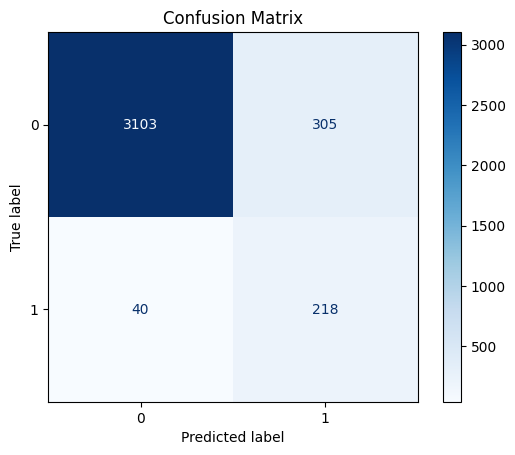

In [95]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
# Step 1: Define features and target
X = df.drop(columns='Q100')  # Features
y = df['Q100']  # Target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Step 3.1: Apply RandomUnderSampler to undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Step 3.2: Apply SMOTE to oversample the minority class
smote_een = SMOTEENN(sampling_strategy=1,random_state=42)
X_train_resampled, y_train_resampled = smote_een.fit_resample(X_train, y_train)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,       # Number of trees
    max_depth=100,         # Maximum depth of each tree (None = no limit)
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    random_state=42,
    class_weight='balanced'  # Balanced class weights
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 10 Features by Importance:\n", feature_importances.head(10))

# Step 8: Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Step 1: Identify columns with a lower threshold for proportion of 1's
num_ones = (df == 1).sum()  # Count number of 1's in each column
proportion_ones = num_ones / len(df)  # Proportion of 1's in each column

# Select columns with a proportion of 1's greater than a lower threshold (e.g., >10%)
threshold = 0.1
columns_high_ones = proportion_ones[proportion_ones > threshold].index

# Step 2: Choose 5 columns with the highest proportion of 1's
columns_high_ones_top5 = columns_high_ones[:5]

# Step 3: Get feature importance from a preliminary Random Forest model
X = df.drop(columns='Q100')  # Features
y = df['Q100']  # Target

# Fit a preliminary Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get top 5 most important features
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

columns_important_top5 = feature_importances['Feature'].head(5).values

# Step 4: Combine the selected features (no duplicates)
selected_columns = list(set(columns_high_ones_top5).union(set(columns_important_top5)))

# Create a new DataFrame with these selected columns
X_selected = df[selected_columns]

# Step 5: Stratified train-test split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Apply RandomUnderSampler to reduce majority class (class 0)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Step 7: Apply SMOTETomek to oversample and clean the training set
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_resampled, y_train_resampled)

# Step 8: Train a Random Forest model using the selected features
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 9: Make predictions and evaluate the model on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Evaluate using cross-validation with Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf_model, X_selected, y, cv=skf, scoring='f1_macro')
print(f"Cross-validated F1 scores: {cross_val_scores}")
print(f"Mean F1 score: {np.mean(cross_val_scores):.2f}")


Model Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      3408
           1       0.31      0.85      0.46       258

    accuracy                           0.86      3666
   macro avg       0.65      0.85      0.69      3666
weighted avg       0.94      0.86      0.89      3666

Cross-validated F1 scores: [0.50559533 0.91494783 0.92912026 0.88838653 0.60984968]
Mean F1 score: 0.77


In [97]:
print(y.value_counts())

Q100
0    17039
1     1289
Name: count, dtype: int64


## Logistic regression

Model Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      3408
           1       0.41      0.94      0.57       258

    accuracy                           0.90      3666
   macro avg       0.70      0.92      0.76      3666
weighted avg       0.95      0.90      0.92      3666

Confusion Matrix:
 [[3058  350]
 [  16  242]]


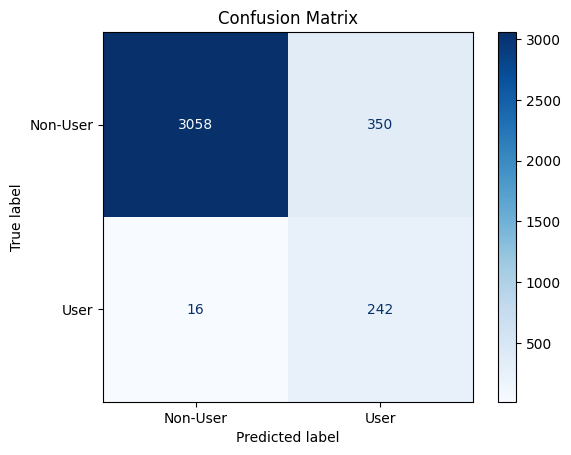

Feature Coefficients:
    Feature  Coefficient
64    Q145     0.265209
0       Q1     0.239537
9      Q48     0.223994
38    Q112     0.222434
67    Q148     0.212392
..     ...          ...
42    Q116    -0.266176
72    Q126    -0.357237
6      Q32    -0.362463
24     Q83    -0.404547
7      Q33    -0.690279

[75 rows x 2 columns]


In [98]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Q100' is your target column and all other columns are features
X = df.drop(columns='Q100')  # Features
y = df['Q100']  # Target (binary: 1 for yes, 0 for no)

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Standardize the features (recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Non-User", "User"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# Optional: Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': df.drop(columns='Q100').columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Feature Coefficients:\n", coefficients)


## Gradient Boost


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'selected_columns' contains the features chosen based on previous importance
X_selected = df[selected_columns]  # Use the pre-selected features
y = df['Q100']  # Target (binary: 0/1 for smoking status)

# Step 1: Stratified train-test split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply RandomUnderSampler to reduce majority class (class 0)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Step 3: Apply SMOTETomek to oversample and clean the training set
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_resampled, y_train_resampled)

# Step 4: Train a Gradient Boosting model using the selected features
gbc_model = GradientBoostingClassifier(
    n_estimators=500,  # Number of boosting stages to be run
    max_depth=6,       # Maximum depth of the individual estimators
    learning_rate=0.1, # Step size shrinkage used to prevent overfitting
    random_state=42    # For reproducibility
)
gbc_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Make predictions and evaluate the model on the test set
y_pred = gbc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Evaluate using cross-validation with Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(gbc_model, X_selected, y, cv=skf, scoring='f1_macro')
print(f"Cross-validated F1 scores: {cross_val_scores}")
print(f"Mean F1 score: {np.mean(cross_val_scores):.2f}")


Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      3408
           1       0.28      0.85      0.42       258

    accuracy                           0.84      3666
   macro avg       0.63      0.84      0.66      3666
weighted avg       0.94      0.84      0.87      3666

Cross-validated F1 scores: [0.51101707 0.51082679 0.55384312 0.5437423  0.50729045]
Mean F1 score: 0.53


In [100]:
subset_df = df.head(200)

# Save the subset to a new CSV file
subset_df.to_excel('subset_data.xlsx', index=False)

Decision Tree Model

Decision Tree Model Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3420
           1       0.42      0.54      0.48       246

    accuracy                           0.92      3666
   macro avg       0.69      0.75      0.72      3666
weighted avg       0.93      0.92      0.92      3666



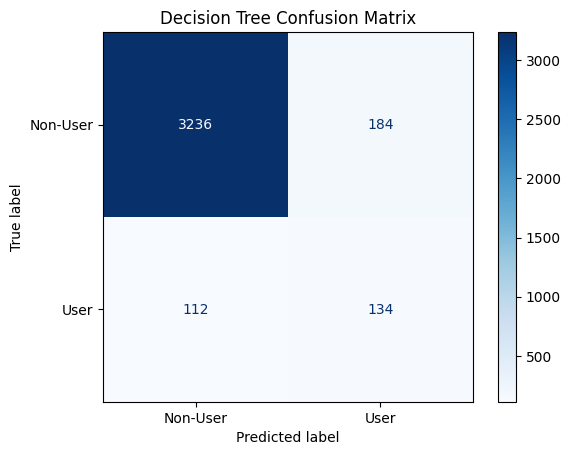

Top 10 Features by Importance:
    Feature  Importance
11     Q50    0.383388
3       Q6    0.150539
16     Q64    0.071845
4      Q30    0.061399
10     Q49    0.028415
7      Q33    0.024123
24     Q83    0.018864
5      Q31    0.011267
40    Q114    0.010864
72    Q126    0.010463


In [101]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Define features and target
X = df.drop(columns='Q100')  # Features
y = df['Q100']  # Target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3 (Optional): Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 4: Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=100,           # Maximum depth of the tree (None = no limit)
    min_samples_split=2,     # Minimum number of samples required to split a node
    min_samples_leaf=1,      # Minimum number of samples required at a leaf node
    max_features='sqrt',     # Number of features to consider at each split (optional, similar to RF)
    random_state=42,
    class_weight='balanced'  # Balanced class weights
)
dt_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, display_labels=["Non-User", "User"], cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Step 7: Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 10 Features by Importance:\n", feature_importances.head(10))


Visualization for Decision Tree

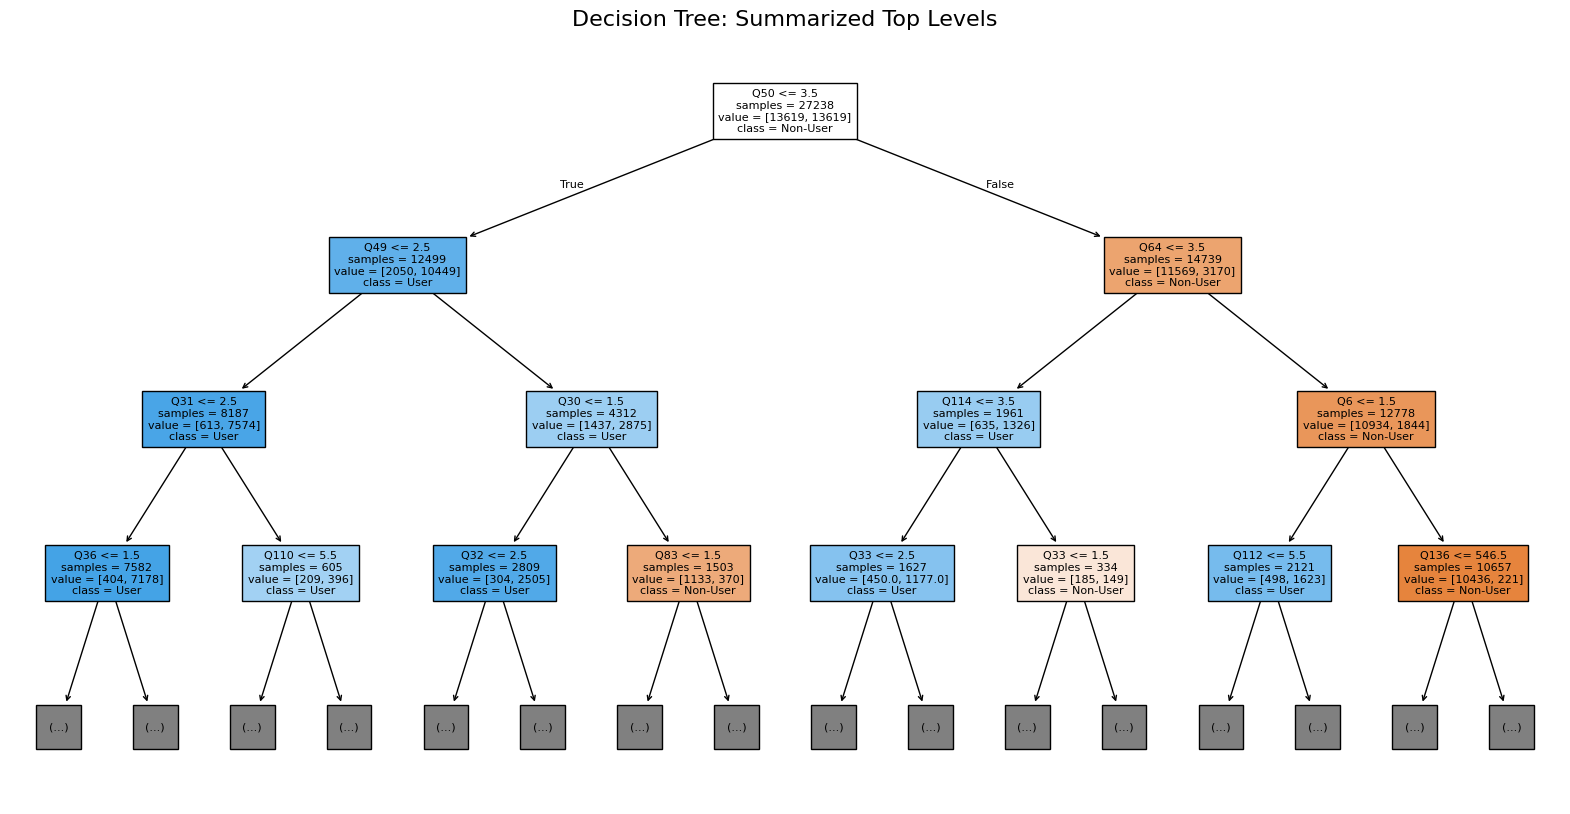

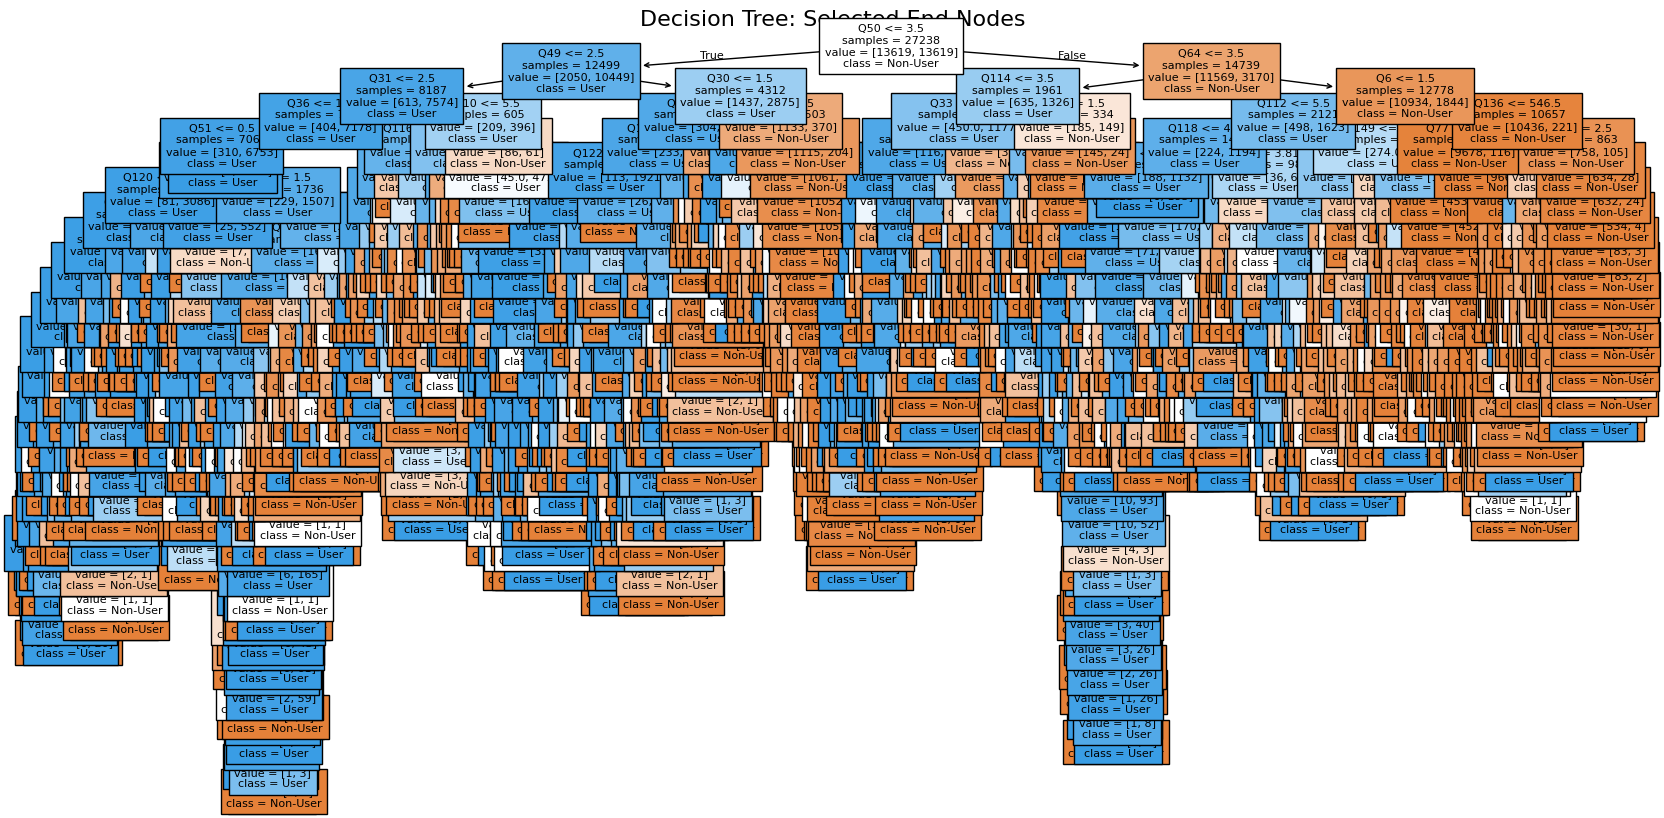

In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot only the top few levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Non-User", "User"],
    filled=True,
    fontsize=8,
    max_depth=3,  # Limit depth to show top levels
    impurity=False
)
plt.title("Decision Tree: Summarized Top Levels", fontsize=16)
plt.show()

# Plot only a focused view of a few end nodes
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Non-User", "User"],
    filled=True,
    fontsize=8,
    max_depth=None,  # Show the full depth
    impurity=False
)
plt.title("Decision Tree: Selected End Nodes", fontsize=16)

# Adjust the view to focus on a specific range of nodes at the bottom
plt.xlim([10, 20])  # Adjust x-axis to show a range of nodes (fine-tune these values)
plt.ylim([0, 3])       # Adjust y-axis to limit the displayed depth
plt.show()


visualization for logistics regression

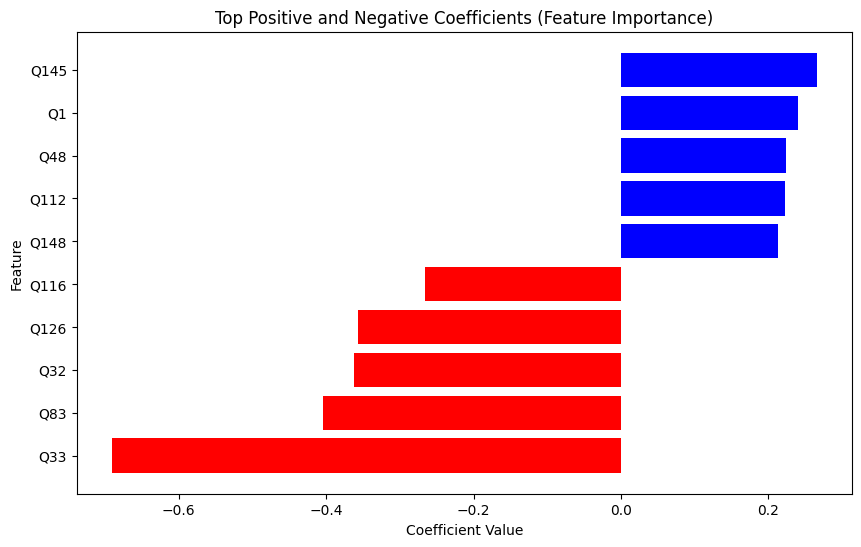

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot the top positive and negative coefficients
plt.figure(figsize=(10, 6))
top_coefficients = pd.concat([coefficients.head(5), coefficients.tail(5)])
plt.barh(top_coefficients['Feature'], top_coefficients['Coefficient'], color=(top_coefficients['Coefficient'] > 0).map({True: 'blue', False: 'red'}))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Positive and Negative Coefficients (Feature Importance)')
plt.gca().invert_yaxis()  # To display the highest at the top
plt.show()


Visualization for GradientBoost

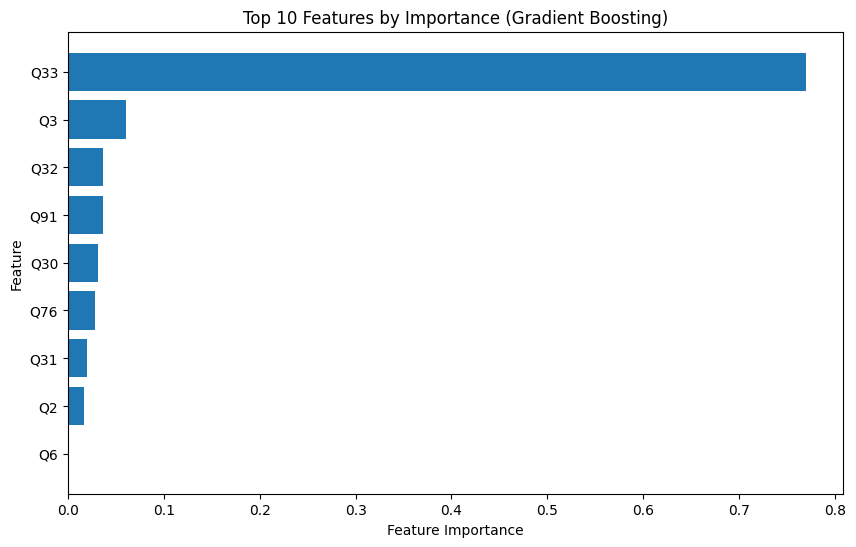

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': gbc_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features by importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()


Now compare and analyze the models

                     Accuracy  F1-score (class 1)  Precision (class 1)  \
Random Forest            0.86                0.46                 0.31   
Logistic Regression      0.90                0.57                 0.41   
Gradient Boosting        0.84                0.42                 0.28   
Decision Tree            0.92                0.48                 0.42   

                     Recall (class 1)  
Random Forest                    0.85  
Logistic Regression              0.94  
Gradient Boosting                0.85  
Decision Tree                    0.54  


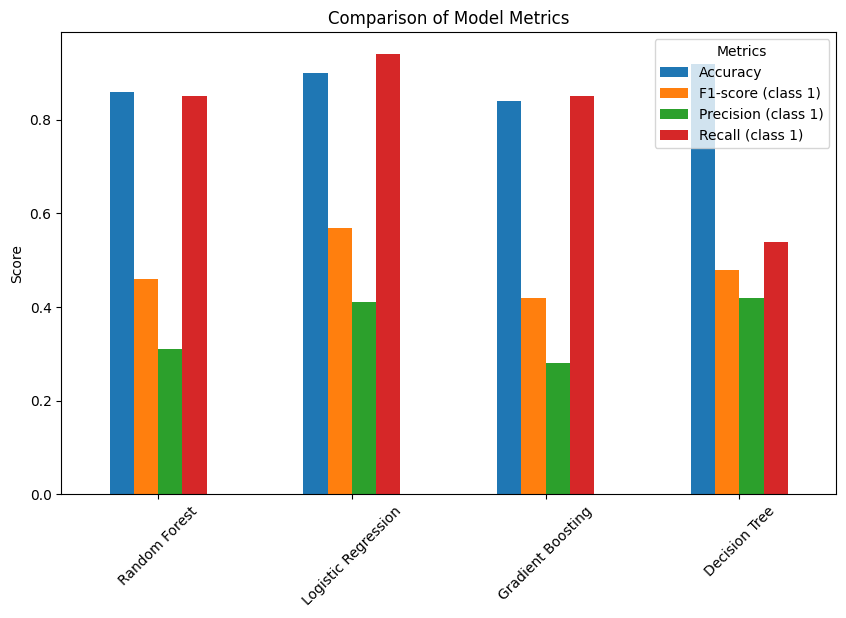

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with classification report metrics for each model
models_metrics = {
    'Random Forest': {'Accuracy': 0.86, 'F1-score (class 1)': 0.46, 'Precision (class 1)': 0.31, 'Recall (class 1)': 0.85},
    'Logistic Regression': {'Accuracy': 0.90, 'F1-score (class 1)': 0.57, 'Precision (class 1)': 0.41, 'Recall (class 1)': 0.94},
    'Gradient Boosting': {'Accuracy': 0.84, 'F1-score (class 1)': 0.42, 'Precision (class 1)': 0.28, 'Recall (class 1)': 0.85},
    'Decision Tree': {'Accuracy': 0.92, 'F1-score (class 1)': 0.48, 'Precision (class 1)': 0.42, 'Recall (class 1)': 0.54},
}

# Convert the dictionary into a DataFrame for visualization
metrics_df = pd.DataFrame(models_metrics).T
print(metrics_df)

# Plot the metrics for comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()


Radar Chart for evaluation

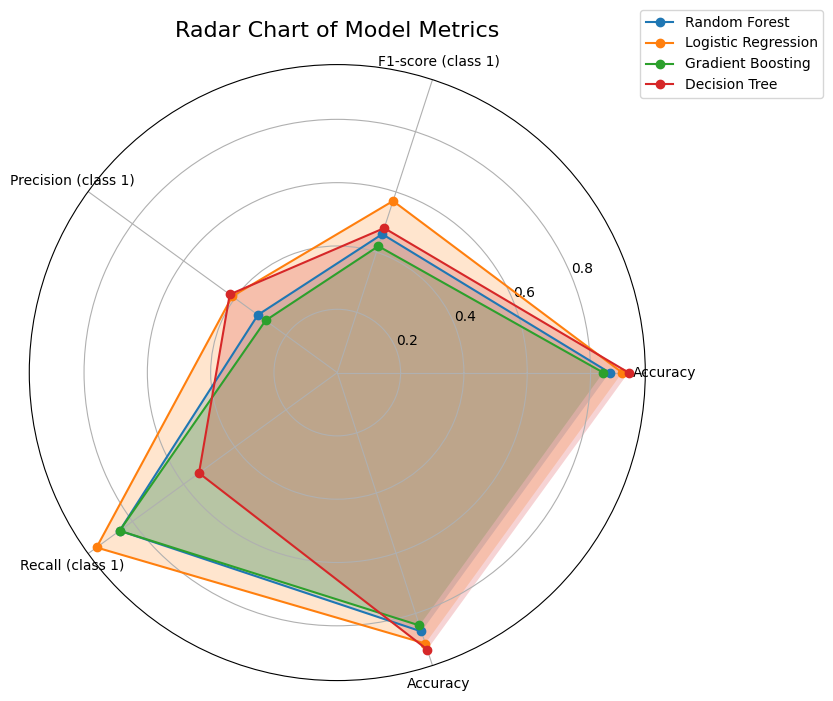

In [107]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd

# Convert metrics data into a radar chart format
metrics_df = pd.DataFrame(models_metrics).T
categories = list(metrics_df.columns)
num_models = len(models_metrics)

# Add the first column to close the radar plot
values = metrics_df.values.tolist()
for row in values:
    row.append(row[0])
categories.append(categories[0])

# Plot each model on the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
for i, model_name in enumerate(models_metrics.keys()):
    ax.plot([2 * pi * j / len(categories) for j in range(len(categories))],
            values[i], label=model_name, marker='o')
    ax.fill([2 * pi * j / len(categories) for j in range(len(categories))],
            values[i], alpha=0.2)

ax.set_xticks([2 * pi * i / len(categories) for i in range(len(categories))])
ax.set_xticklabels(categories)
ax.set_title("Radar Chart of Model Metrics", size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Stacked Bar Chart for evaluation

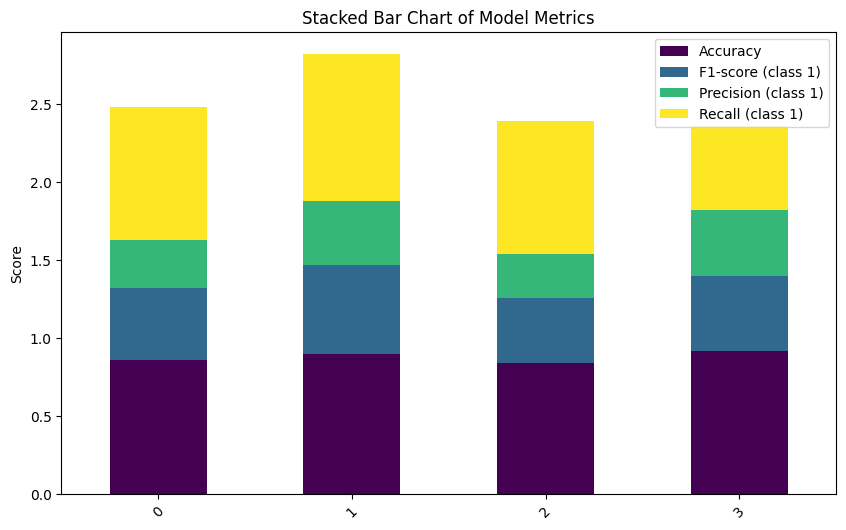

In [112]:
metrics_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
